<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

# Step 1: Load dataset
df = pd.read_csv('samples_cancer.csv')
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df = df.dropna().reset_index(drop=True)

In [3]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
        'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
y = df['Class'].map({2: 0, 4: 1}).values

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train and evaluate SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kern in kernels:
    model = SVC(kernel=kern, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jacc = jaccard_score(y_test, y_pred)
    err = 1 - acc
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    results[kern] = {
        'model': model,
        'accuracy': acc,
        'recall': rec,
        'precision': prec,
        'f1': f1,
        'jaccard': jacc,
        'error_rate': err,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

In [6]:

# Print results
for kern in kernels:
    r = results[kern]
    print(f"SVM kernel: {kern}")
    print(f"Accuracy : {r['accuracy']:.4f}")
    print(f"Recall   : {r['recall']:.4f}")
    print(f"Precision: {r['precision']:.4f}")
    print(f"F1-Score : {r['f1']:.4f}")
    print(f"Jaccard  : {r['jaccard']:.4f}")
    print(f"Error Rt : {r['error_rate']:.4f}")
    tn, fp, fn, tp = r['confusion_matrix'].ravel()
    print("CONFUSION MATRIX (rows=Actual, cols=Predicted)")
    print(f"       Pred:0   Pred:1")
    print(f"Act:0     {tn:4d}     {fp:4d}")
    print(f"Act:1     {fn:4d}     {tp:4d}")
    print(f"AUC      : {r['auc']:.4f}")
    print("-" * 40)

SVM kernel: linear
Accuracy : 0.9562
Recall   : 0.9583
Precision: 0.9200
F1-Score : 0.9388
Jaccard  : 0.8846
Error Rt : 0.0438
CONFUSION MATRIX (rows=Actual, cols=Predicted)
       Pred:0   Pred:1
Act:0       85        4
Act:1        2       46
AUC      : 0.9918
----------------------------------------
SVM kernel: poly
Accuracy : 0.9562
Recall   : 0.9167
Precision: 0.9565
F1-Score : 0.9362
Jaccard  : 0.8800
Error Rt : 0.0438
CONFUSION MATRIX (rows=Actual, cols=Predicted)
       Pred:0   Pred:1
Act:0       87        2
Act:1        4       44
AUC      : 0.9927
----------------------------------------
SVM kernel: rbf
Accuracy : 0.9635
Recall   : 0.9792
Precision: 0.9216
F1-Score : 0.9495
Jaccard  : 0.9038
Error Rt : 0.0365
CONFUSION MATRIX (rows=Actual, cols=Predicted)
       Pred:0   Pred:1
Act:0       85        4
Act:1        1       47
AUC      : 0.9759
----------------------------------------
SVM kernel: sigmoid
Accuracy : 0.9416
Recall   : 0.9167
Precision: 0.9167
F1-Score : 0.9167
J

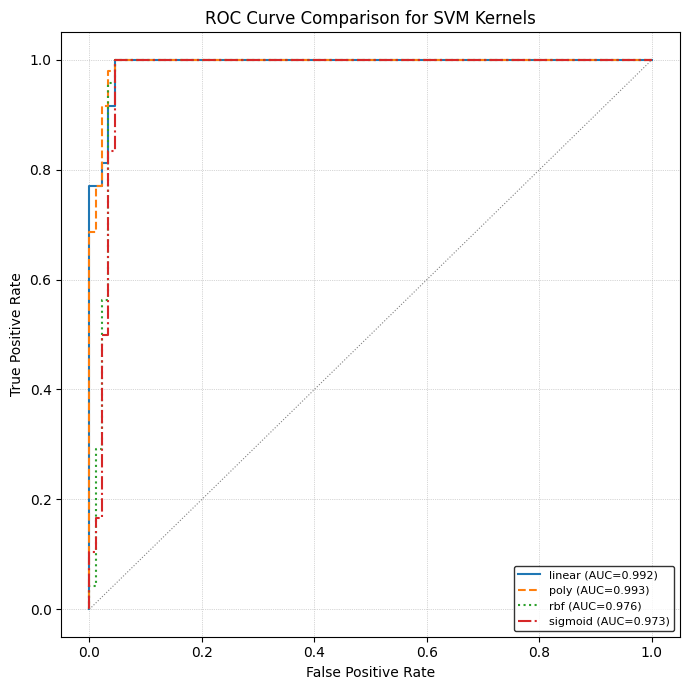

In [7]:
# ROC Curve comparison
plt.figure(figsize=(7,7))
linestyles = {'linear': '-', 'poly': '--', 'rbf': ':', 'sigmoid': '-.'}

for kern in kernels:
    r = results[kern]
    plt.plot(r['fpr'], r['tpr'], linestyle=linestyles[kern],
             linewidth=1.5, label=f"{kern} (AUC={r['auc']:.3f})")

plt.plot([0, 1], [0, 1], linestyle=':', linewidth=0.8, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.legend(edgecolor='black', fontsize=8)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()